## Subtask 1

After googling ".nii python" I quickly found 

https://nipy.org/nibabel/nifti_images.html

and

https://neuraldatascience.io/8-mri/nifti.html

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
nii_path = 'data/BraTS20_Validation_002_flair.nii'
nii_object = nib.load(nii_path)

nii_object.shape

(240, 240, 155)

In [3]:
print(nii_object.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0

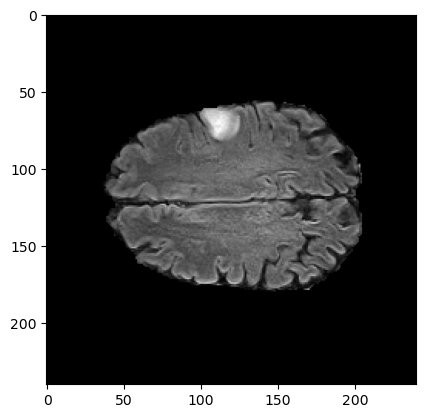

In [ ]:
# get floating point data
img_data = nii_object.get_fdata()

x = 99
slice_at_x = img_data[:,:,x]

plt.imshow(slice_at_x, cmap='gray')
plt.show()

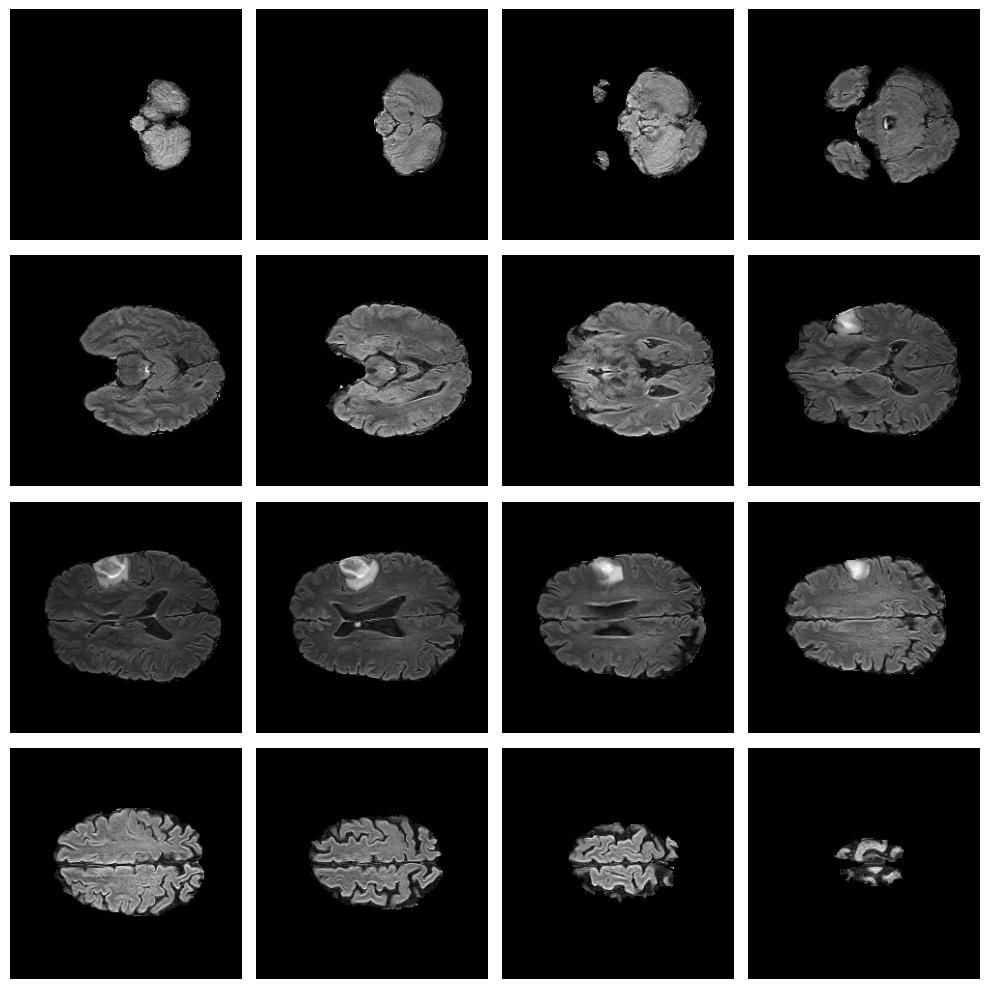

In [21]:
# explore the image series

# grid setup
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols

# iterator setup
n_slices = img_data.shape[2]
step_size = n_slices // n_subplots
# avoid out of bounds
slice_indices = list(range(0, n_slices, step_size))[:n_subplots]

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for ix, img_ix in enumerate(slice_indices):
    axs.flat[ix].imshow(img_data[:, :, img_ix], cmap='gray')
    axs.flat[ix].axis('off')
        
plt.tight_layout()
plt.show()


## Subtask 2

### Image Classification Brainstorming

To address the class imbalance:
- Over and/or undersampling
- Augmentation techniques
- Weighted loss function (cross entropy, focal loss)
- Transfer learning
- Evaluation metrics: precision, recall, F1-score, ROC-AUC, and the confusion matrix

Interesting:

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data  is this the same data set?

https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy  informative guide

https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 publication on the topic

In [33]:
import os
import matplotlib.pyplot as plt
from PIL import Image

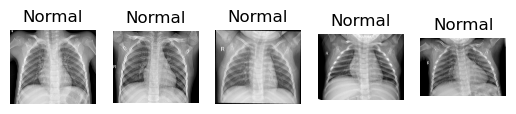

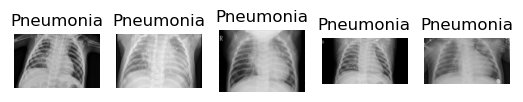

In [34]:
# Paths
train_normal = "data/train/NORMAL"
train_pneumonia = "data/train/PNEUMONIA"

# Example visualization
def show_sample_images(folder, label, num=5):
    files = os.listdir(folder)[:num]
    for i, file in enumerate(files):
        img = Image.open(os.path.join(folder, file))
        plt.subplot(1, num, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.show()

show_sample_images(train_normal, "Normal")
show_sample_images(train_pneumonia, "Pneumonia")
